import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Loading the data

In [2]:
address = "C:/Users/hp/Desktop/Kifya/Week_8&9/data/"
df_fraud = pd.read_csv(address+'raw/Fraud_Data.csv')
df_Ip = pd.read_csv(address+'raw/IpAddress_to_Country.csv')
df_credit = pd.read_csv(address+'raw/creditcard.csv')

In [3]:
print(df_fraud.head())
df_fraud.describe()

   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  


,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [4]:
print(df_credit.head())
df_credit.describe()

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
print(df_Ip.head())
df_Ip.describe()

   lower_bound_ip_address  upper_bound_ip_address    country
0              16777216.0                16777471  Australia
1              16777472.0                16777727      China
2              16777728.0                16778239      China
3              16778240.0                16779263  Australia
4              16779264.0                16781311      China


,lower_bound_ip_address,upper_bound_ip_address
count,1.388460e+05,1.388460e+05
mean,2.724532e+09,2.724557e+09
std,8.975215e+08,8.974979e+08
min,1.677722e+07,1.677747e+07
25%,1.919930e+09,1.920008e+09
50%,3.230887e+09,3.230888e+09
75%,3.350465e+09,3.350466e+09
max,3.758096e+09,3.758096e+09


handle missing values

In [6]:
print(df_fraud.isna().sum())
print(df_credit.isna().sum())
print(df_Ip.isna().sum())

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64


dropping duplicates

In [7]:
df_fraud.drop_duplicates(inplace=True)
df_credit.drop_duplicates(inplace=True)
df_Ip.drop_duplicates(inplace=True)

correcting data types

In [8]:
df_fraud['signup_time'] = pd.to_datetime(df_fraud['signup_time'])
df_fraud['purchase_time'] = pd.to_datetime(df_fraud['purchase_time'])

EDA

UNIVARIATE EDA

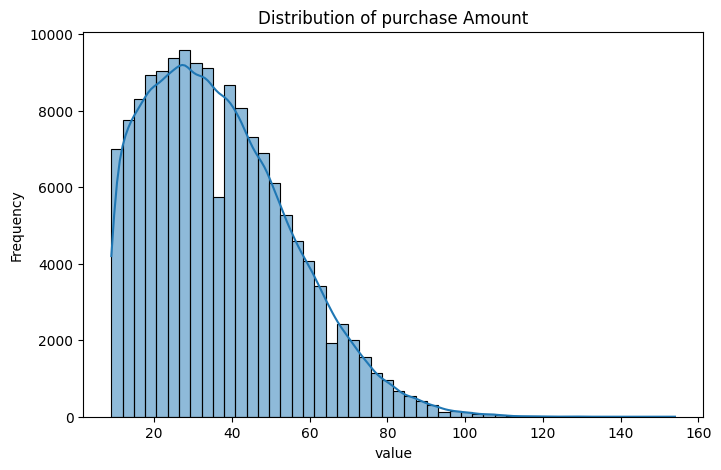

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(df_fraud['purchase_value'], bins=50, kde=True)
plt.title('Distribution of purchase Amount')
plt.xlabel('value')
plt.ylabel('Frequency')
plt.show()

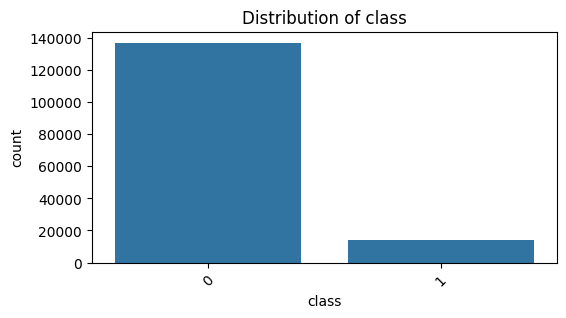

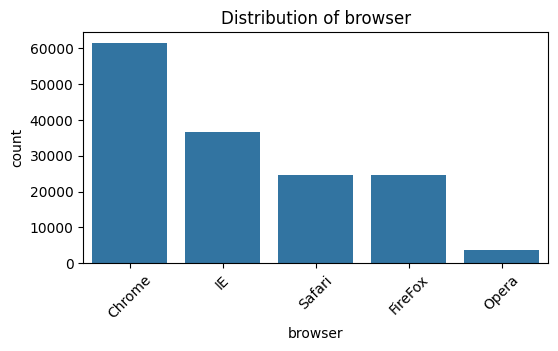

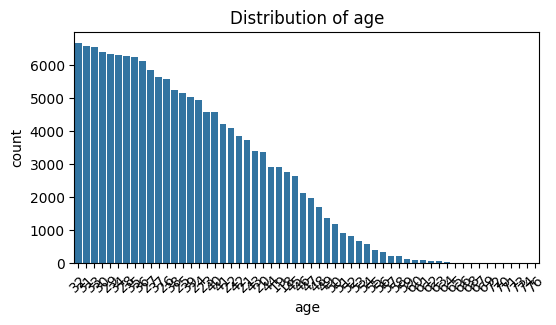

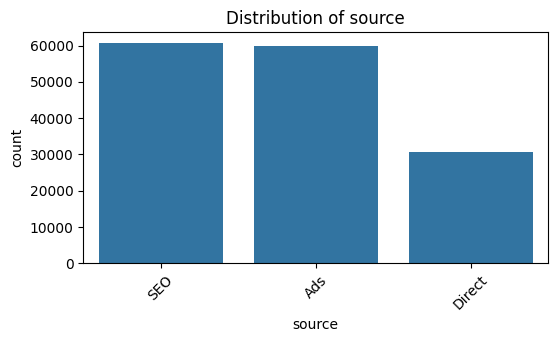

In [10]:
categorical_cols = ['class', 'browser', 'age', 'source']
for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df_fraud, x=col, order=df_fraud[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


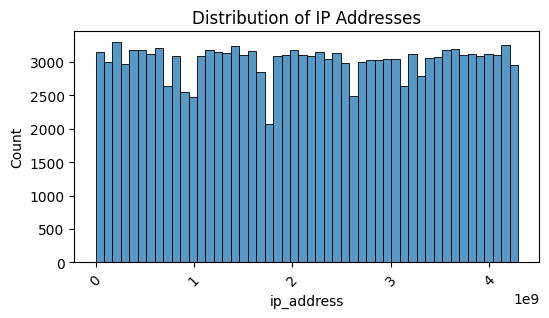

In [11]:
plt.figure(figsize=(6, 3))
sns.histplot(df_fraud['ip_address'], bins=50)
plt.title(f'Distribution of IP Addresses')
plt.xticks(rotation=45)
plt.show()

BIVARIENT

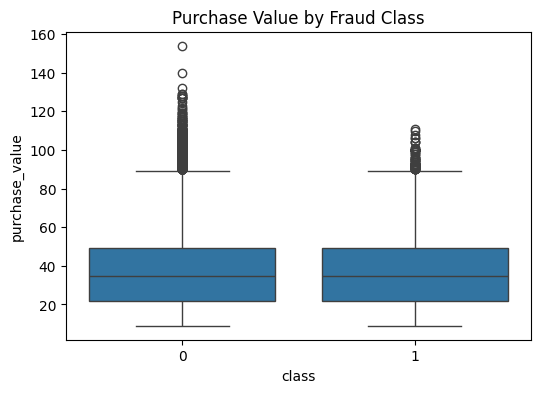

In [12]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_fraud, x='class', y='purchase_value')
plt.title('Purchase Value by Fraud Class')
plt.show()


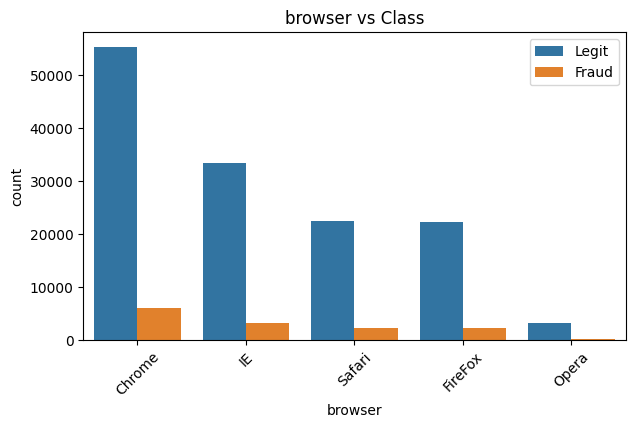

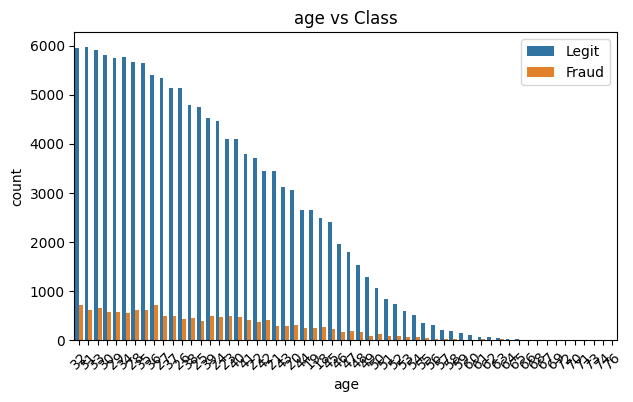

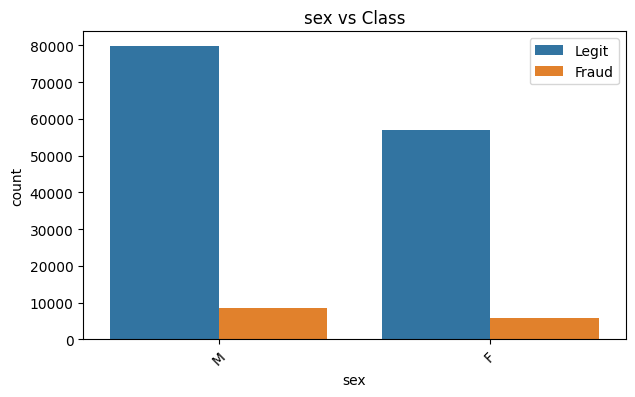

In [13]:
categorical_cols = ['browser', 'age', 'sex']
for col in categorical_cols:
    plt.figure(figsize=(7, 4))
    sns.countplot(data=df_fraud, x=col, hue='class', order=df_fraud[col].value_counts().index)
    plt.title(f'{col} vs Class')
    plt.xticks(rotation=45)
    plt.legend(['Legit', 'Fraud'])
    plt.show()


Merging

In [14]:
def find_country(ip):
    mask = (df_Ip['lower_bound_ip_address'] <= ip) & (df_Ip['upper_bound_ip_address'] >= ip)
    matching_rows = df_Ip[mask]
    
    if not matching_rows.empty:
        return matching_rows.iloc[0]['country']
    return np.nan

df_fraud['country'] = df_fraud['ip_address'].apply(find_country)
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [ ]:
recent_purchases = df_fraud.groupby('user_id')['purchase_time_x_x'].max().reset_index()
recent_purchases.columns = ['user_id', 'purchase_time_x']
df_fraud = df_fraud.merge(recent_purchases, on='user_id')

In [49]:
df_fraud['time_since_signup'] = (df_fraud['perchase_time'] - df_fraud['signup_time']).dt.total_seconds() // (3600 * 24)
df_fraud.head()

,user_id,signup_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,frequency,hour_of_day,Day_of_Week,perchase_time,recent_purchase_time,time_since_signup
0,22058,2015-02-24 22:55:49,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,2,Saturday,2015-04-18 02:47:11,2015-04-18 02:47:11,52.0
1,333320,2015-06-07 20:39:50,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1,1,Monday,2015-06-08 01:38:54,2015-06-08 01:38:54,0.0
2,1359,2015-01-01 18:52:44,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1,18,Thursday,2015-01-01 18:52:45,2015-01-01 18:52:45,0.0
3,150084,2015-04-28 21:13:25,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN,1,13,Monday,2015-05-04 13:54:50,2015-05-04 13:54:50,5.0
4,221365,2015-07-21 07:09:52,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1,18,Wednesday,2015-09-09 18:40:53,2015-09-09 18:40:53,50.0


In [17]:
df_fraud['frequency'] = df_fraud.groupby('user_id')['user_id'].transform('count')
df_fraud['hour_of_day'] = df_fraud['purchase_time'].dt.hour
df_fraud['Day_of_Week'] = df_fraud['purchase_time'].dt.day_name()
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,recent_purchase_time_x,recent_purchase_time_y,frequency,hour_of_day,Day_of_Week
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,2015-04-18 02:47:11,2015-04-18 02:47:11,1,2,Saturday
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,2015-06-08 01:38:54,2015-06-08 01:38:54,1,1,Monday
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,2015-01-01 18:52:45,2015-01-01 18:52:45,1,18,Thursday
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN,2015-05-04 13:54:50,2015-05-04 13:54:50,1,13,Monday
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,2015-09-09 18:40:53,2015-09-09 18:40:53,1,18,Wednesday


class
0    0.906354
1    0.093646
Name: proportion, dtype: float64


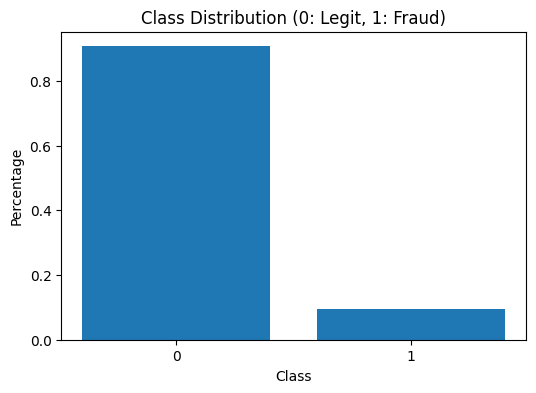

In [50]:
class_dist = df_fraud['class'].value_counts(normalize=True)
print(class_dist)

plt.figure(figsize=(6, 4))
plt.bar(class_dist.index.astype(str), class_dist.values)
plt.title('Class Distribution (0: Legit, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.show()

SAMPLING

In [53]:
df_fraud.columns

Index(['user_id', 'signup_time', 'purchase_value', 'device_id', 'source',
       'browser', 'sex', 'age', 'ip_address', 'class', 'country', 'frequency',
       'hour_of_day', 'Day_of_Week', 'perchase_time', 'recent_purchase_time',
       'time_since_signup'],
      dtype='object')

In [64]:
X = df_fraud[['purchase_value','age','frequency','hour_of_day']]
y = df_fraud['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [65]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Resampled class counts:\n", y_train_resampled.value_counts())

Resampled class counts:
 class
0    109568
1    109568
Name: count, dtype: int64


NORMALIZATION and SCALING

In [66]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
X_train_resampled[numerical_cols] = scaler.fit_transform(X_train_resampled[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

ENCODING

In [69]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train_resampled[categorical_cols])
X_train_encoded = pd.DataFrame(
    X_train_encoded,
    columns=encoder.get_feature_names_out(categorical_cols),
    index=X_train_resampled.index
)
X_test_encoded = encoder.transform(X_test[categorical_cols])
X_test_encoded = pd.DataFrame(
    X_test_encoded,
    columns=encoder.get_feature_names_out(categorical_cols),
    index=X_test.index
)
X_train_final = pd.concat([
    X_train_resampled[numerical_cols],
    X_train_encoded
], axis=1)

X_test_final = pd.concat([
    X_test[numerical_cols],
    X_test_encoded
], axis=1)

SAVE

In [76]:
df_fraud

,user_id,signup_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,frequency,hour_of_day,Day_of_Week,perchase_time,recent_purchase_time,time_since_signup
0,22058,2015-02-24 22:55:49,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,2,Saturday,2015-04-18 02:47:11,2015-04-18 02:47:11,52.0
1,333320,2015-06-07 20:39:50,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1,1,Monday,2015-06-08 01:38:54,2015-06-08 01:38:54,0.0
2,1359,2015-01-01 18:52:44,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1,18,Thursday,2015-01-01 18:52:45,2015-01-01 18:52:45,0.0
3,150084,2015-04-28 21:13:25,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN,1,13,Monday,2015-05-04 13:54:50,2015-05-04 13:54:50,5.0
4,221365,2015-07-21 07:09:52,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1,18,Wednesday,2015-09-09 18:40:53,2015-09-09 18:40:53,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,United States,1,0,Sunday,2015-03-29 00:30:47,2015-03-29 00:30:47,60.0
151108,274471,2015-05-15 17:43:29,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,Netherlands,1,12,Tuesday,2015-05-26 12:24:39,2015-05-26 12:24:39,10.0
151109,368416,2015-03-03 23:07:31,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,Japan,1,7,Wednesday,2015-05-20 07:07:47,2015-05-20 07:07:47,77.0
151110,207709,2015-07-09 20:06:07,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,United States,1,9,Monday,2015-09-07 09:34:46,2015-09-07 09:34:46,59.0


In [89]:
df_fraud.to_csv(address +'clean/processed_data.csv', index=False)